### Input seran los comentarios y los output seran sentimientos

Input(x) -> Comentarios (review) <br>
Output(y) -> Sentimientos

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [34]:
df_review = pd.read_csv('data\IMDB Dataset.csv')

df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [35]:
df_review.value_counts('sentiment')

sentiment
negative    25000
positive    25000
Name: count, dtype: int64

In [36]:
#Reducir filas

df_positivo = df_review[df_review['sentiment'] == 'positive'][:9000]
df_negativo = df_review[df_review['sentiment'] == 'negative'][:1000]


df_review_des = pd.concat([df_positivo,df_negativo])

# saber la cantidad 
df_review_des.value_counts('sentiment')



sentiment
positive    9000
negative    1000
Name: count, dtype: int64

Clases desequilibradas

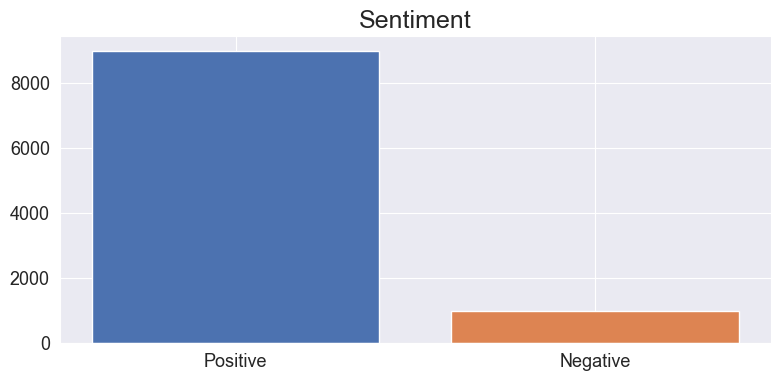

In [37]:
colors = sns.color_palette('deep')
plt.figure(figsize=(8,4), tight_layout = True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_des.value_counts(['sentiment']),
        color = colors[:2]
        )
plt.title('Sentiment')
plt.savefig('files/sentiment_des.png')
plt.show()

In [38]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_review_des[['review']],
                                                          df_review_des['sentiment'])

df_review_bal.value_counts(['sentiment'])

sentiment
negative     1000
positive     1000
Name: count, dtype: int64

### Separando data para entrenar (train) y testear (test)

In [39]:

train, test = train_test_split( df_review_bal, 
                 test_size=0.33,
                 random_state=42
                 )
# esto genera dos dataset por esa razon hay dos variables

In [40]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']



##### Transformando data a numeros

###### Representacion de text (bag of words)

- CountVectorize
- Tfidf

CountVectorize

In [41]:
#Ejemplo simple

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["Amo el amor cuando el amor este con el amor sin el amor el amor ya es amor",
        "Aqui estoy cambiando las palabras"]

df = pd.DataFrame({'review': ['review1','review2'], 'text':text})
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())
df_dtm



,amo,amor,aqui,cambiando,con,cuando,el,es,este,estoy,las,palabras,sin,ya
review1,1,6,0,0,1,1,5,1,1,0,0,0,1,1
review2,0,0,1,1,0,0,0,0,0,1,1,1,0,0


Tfidf (term frequency - inverse document frequency)

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["Amo el amor cuando el amor este con el amor sin el amor el amor ya es amor",
        "Aqui estoy cambiando las palabras"]

df = pd.DataFrame({'review': ['review1','review2'], 'text':text})
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['text'])

#tfidf_matrix.toarray()
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names_out())
df_dtm

,amo,amor,aqui,cambiando,con,cuando,el,es,este,estoy,las,palabras,sin,ya
review1,0.121268,0.727607,0.000000,0.000000,0.121268,0.121268,0.606339,0.121268,0.121268,0.000000,0.000000,0.000000,0.121268,0.121268
review2,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000


#### Transformar data texto a data numerica

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')



train_x_vector = tfidf.fit_transform(train_x)

test_x_vector = tfidf.transform(test_x)




In [44]:

train_x_vector
df_mb = pd.DataFrame(train_x_vector.toarray(),index=train_x.values, columns=tfidf.get_feature_names_out())
df_mb

,00,000,007,00s,0126,01pm,02,04,07,08,...,zorkin,zu,zues,zzzzzzzzzzzzzzzzzz,zázvorková,æon,élan,étc,ísnt,ünfaithful
"I just got back from this free screening, and this ""Osama Witch Project"" is the hands-down worst film I've seen this year, worse than even ""Catwoman"" - which had the decency to at least pass itself off as fiction.<br /><br />In ""September Tapes,"" a ""film crew"" of ""documentary journalists"" heads to Afghanistan - despite being thoroughly unprepared for the trip, the conditions and, oh yeah, the psychotic and ridiculous vendetta of their filmmaker leader to avenge his wife's death on Sept. 11 - to track down Osama bin Laden.<br /><br />They ""made"" eight tapes on their journey, which now ""document"" their travels and, of course, their attempts to kill the terrorist leader. (The eight tapes, thankfully, all end at points significant in the narrative, which is convenient for a ""documentary."")<br /><br />The psychotic, idiotic protagonist - who is given to long, significant speeches that he probably learned watching ""MacGyver"" - cares nothing for his own life or the life of his innocent crew as he gets them further and further into danger through a series of completely dumb mishaps. I don't know why he didn't just wear a sign on his back that said ""Shoot me.""<br /><br />The crew's translator, supposedly their sensible voice-of-reason, does little more than whine and gets baffled as the idiot hero leads them into doom. <br /><br />You wish they'd brought along someone on their trip to call them all morons.<br /><br />Around ""Tape 4,"" I began rooting for the terrorists to shoot the film crew.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
"Claire Denis's movies seem to fall into one of two categories: the violent and bloody or the quiet and intimate. ""L'Intrus"" definitely falls into the first category, but it's not so awful as ""Trouble Every Day"" or ""J'ai pas sommeil.""<br /><br />Now, ever since I saw ""Chocolat,"" I've made it a point to see every new movie Denis makes. And I have always been disappointed. ""L'Intrus"" was no exception. She has yet to make a movie as personal and as moving as her first one. <br /><br />You get a lot of the Denis regulars: an older but still magnificent Béatrice Dalle who seems to be in the movie only to show off her full lips, the gap between her teeth, her ample cleavage, and a couple of nice coats; the black guy from ""Trouble Every Day"" and ""J'ai pas sommeil,"" Grégoire Colin, and that Lithuanian or Russian girl. Michel Subor's character was interesting enough, but the camera lingered on him at such length that I got annoyed by that curly forelock of hair hanging over his forehead and was relieved when, somewhere in Korea, I think, he finally got it cut. <br /><br />There was certainly some action--gruesome murders, a man's search for a son--and there may even have been a plot, but one viewing wasn't enough to figure it out, and two viewings are, I fear, out of the question. For one thing, the score was jarring and obtrusive (as in ""Beau Travail""). For another, the seasons changed too abruptly, leaving you even more confused about what was going on. Oh, there were a few pretty shots, and if you liked ""Friday Evening"" with its shots of the folds in heavy drapes and bedsheets, you might appreciate the aesthetics of ""L'Intrus."" Otherwise, steer clear. <br /><br />I saw this movie in French and it's possible I missed something crucial. But the dialogue in a Denis movie rarely amounts to more than five pages, double spaced and with ample margins. In ""Chocolat"" the silence is sublime; in ""L'Intrus,"" it's just dull.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
"Robot Jox tries hard, but is fundamentally a series of fight scenes strung together -- robot against robot, man against man, man against woman. The premise had potential, but it seems the script wasn't really

#### Support Vector Machines (SVM)

In [45]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
#
#print(train_y)
svc.fit(train_x_vector, train_y)




SVC(kernel='linear')

#### TESTEO


In [46]:
print(svc.predict(tfidf.transform(['Super bad'])))
print(svc.predict(tfidf.transform(['Really? Good!'])))
print(svc.predict(tfidf.transform(['like this movie'])))




['negative']
['positive']
['negative']


#### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

dec_tree.fit(train_x_vector, train_y)


DecisionTreeClassifier()

#### Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()


lr.fit(train_x_vector, train_y)

LogisticRegression()

## Evaluando Modelos

Score

In [50]:
print(svc.score(test_x_vector,test_y))
print(dec_tree.score(test_x_vector,test_y))
print(gnb.score(test_x_vector.toarray(),test_y))
print(lr.score(test_x_vector,test_y))

0.8348484848484848
0.6848484848484848
0.6075757575757575
0.8287878787878787


F1 Score
~~~
F1 Score = 2*(Recall * Precision)/(Recall+Precision)
~~~

In [51]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.83755589, 0.83204931])

Reporte de clasificacion

In [52]:
from sklearn.metrics import classification_report

print(classification_report(test_y, svc.predict(test_x_vector),
                      labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.84      0.84      0.84       335
    negative       0.83      0.83      0.83       325

    accuracy                           0.83       660
   macro avg       0.83      0.83      0.83       660
weighted avg       0.83      0.83      0.83       660



Confusion Matrix

In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, svc.predict(test_x_vector),
                      labels=['positive', 'negative'])

array([[281,  54],
       [ 55, 270]])

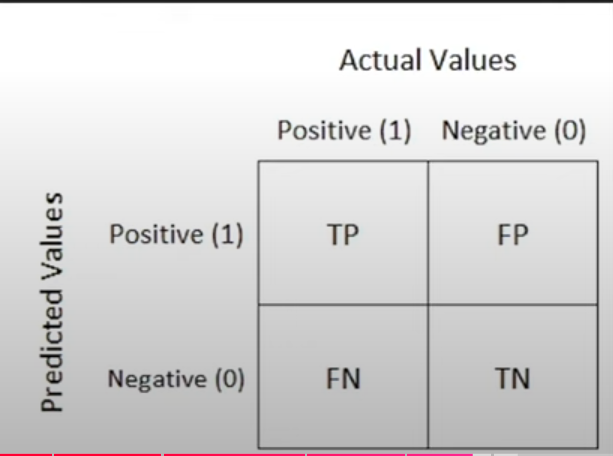

#### Optimizacion del model

GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

parametros = {'C': [1,4,8,16,32],'kernel': ['linear','rbf'] }

svc = SVC()

svc_grid = GridSearchCV(svc,parametros,cv=5)

svc_grid.fit(train_x_vector,train_y)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [56]:
print(svc_grid.best_estimator_)
print(svc_grid.best_params_)

SVC(C=4)
{'C': 4, 'kernel': 'rbf'}


In [57]:
svc_grid.best_score_

np.float64(0.8261194029850747)